In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
from sklearn.datasets import load_boston
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn import metrics
#from sklearn import preprocessing
#import torch


In [3]:
#加载波士顿房价的数据
data = load_boston()
train = pd.DataFrame(data.data,columns=data.feature_names)
train['price'] = data.target

In [4]:
#查看有多少个样本
format(train.shape[0])

'506'

In [8]:
# 查看数据类型
#train.get_dtype_counts()

In [10]:
# 查看空值
#train.isnull().sum()

In [11]:
# 查看数据大小
train.shape

(506, 14)

In [12]:
# 查看数据描述
train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
train.corr()['price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
price      1.000000
Name: price, dtype: float64

In [14]:
#可以具体看看前面 5 个训练集长什么样子，可以看到，前面都是这个房屋的属性，最后是房屋的价格
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
#我们取出第二个特征到倒数第二个特征，这些特征作为我们神经网络的输入特征
all_features = train.loc[:,'CRIM':'LSTAT']
#接着我们需要进行数据标准化，对于所有的数值特征，我们都会减去均值，除以方差
numeric_feats = all_features.dtypes[all_features.dtypes != "object"].index # 取出所有的数值特征
# 减去均值，除以方差
all_features[numeric_feats] = all_features[numeric_feats].apply(lambda x: (x - x.mean()) 
                                                                / (x.std()))


D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [16]:

num_train = train.shape[0]

In [19]:
all_features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


In [18]:
#所有的训练集和验证集都取出成为一个 numpy 的数组
num_train = train.shape[0]

train_features = all_features[:num_train].values

train_labels = train.price.values


In [23]:
train_features.shape

(506, 13)

In [22]:
train_labels.shape


(506,)

In [39]:
from torch import nn

def get_model():
    # todo: 使用 nn.Sequential 来构造多层神经网络，注意第一层的输入
    #m=nn.Linear(20,30)//我造的m是用来把拥有20种特征值的那种样本输入转变成拥有30种特征值的输出，不管你输入多少组，
    #就是说不过输入多少样本，但你必须特征值的种类数是20。

    model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
    )
    return model

In [40]:
# 可以调整的超参

batch_size = 32
epochs = 100
#use_gpu = False   # 没有gpu的改为False即可
lr = 0.1
weight_decay = 0

In [41]:
criterion = nn.MSELoss()
# 回归任务一般用MSELoss, 分类用CrossEntropy
# todo: 使用 mse 作为 loss 函数

In [42]:
import torch
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader

#from utils import get_rmse_log

In [43]:
# todo: 将所有的 feature 和 label 都转成 torch 的 Tensor
train_features = torch.Tensor(train_features)
print(train_features.shape)


train_labels = torch.Tensor(train_labels)
print(train_labels.shape)


torch.Size([506, 13])
torch.Size([506])


In [44]:
# 构建一个数据的迭代器
def get_data(x, y, batch_size, shuffle):
    dataset = TensorDataset(x, y)
    return DataLoader(dataset, batch_size, shuffle=shuffle, num_workers=0)#全部加载到主进程
#dataset 数据集，batch_size加载的每批数据中的样本量，shuffle数据是否打乱，num_workers几线程

In [45]:
train_data = get_data(train_features,train_labels, batch_size, True)
print(train_data)

D:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([26])) that is different to the input size (torch.Size([26, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 0, train loss: 6.362

epoch: 10, train loss: 0.427

epoch: 20, train loss: 0.415

epoch: 30, train loss: 0.415

epoch: 40, train loss: 0.415

epoch: 50, train loss: 0.411

epoch: 60, train loss: 0.414

epoch: 70, train loss: 0.408

epoch: 80, train loss: 0.409

epoch: 90, train loss: 0.408



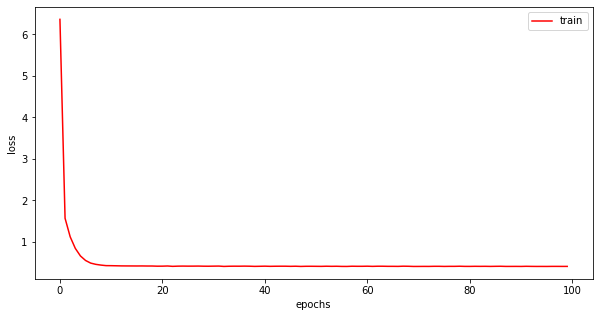

In [52]:
def train_model(model, x_train, y_train, x_valid, y_valid, epochs, lr, weight_decay):
#    if use_gpu:
#       model = model.cuda()
    metric_log = dict()
    metric_log['train_loss'] = list()
#    if x_valid is not None:
#        metric_log['valid_loss'] = list()
    
    train_data = get_data(x_train, y_train, batch_size, True)
    
#    if x_valid is not None:
#        valid_data = get_data(x_valid, y_valid, batch_size, False)
#    else:
#        valid_data = None
    
    optimizer = torch.optim.SGD(model.parameters(), lr, weight_decay)# todo: 构建优化器，推荐使用 Adam，也可以尝试一下别的优化器
    
    for e in range(epochs):
        # 训练模型
        running_loss = 0
        model.train()
        for data in train_data:
            x, y = data
#            if use_gpu:
#                x = x.cuda()
#                y = y.cuda()
            x = Variable(x)
            y = Variable(y)
            
            # todo: 前向传播
            out = model(x)
            # todo: 计算 loss
            #torch.clamp(input, min, max, out=None),将输入input张量每个元素的范围限制到区间 [min,max]，返回结果到一个新张量。
            clipped_out = torch.clamp(out, 1e-8, float('inf'))   
            loss = torch.sqrt(criterion(clipped_out.log(), y.log()))
            
            
            #criterion = nn.MSELoss(size_average=False).cuda()
            #...
            #loss = criterion(output, target)
            #loss.backward()
            # todo: 反向传播，更新参数
            optimizer.zero_grad()#optimizer.zero_grad()意思是把梯度置零
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            
        metric_log['train_loss'].append(running_loss/len(train_data))
        
        
        print_str = 'epoch: {}, train loss: {:.3f}'.format(e, metric_log['train_loss'][-1])
        if (e ) % 10 == 0:
            print(print_str)
            print()
       

    # =======不要修改这里的内容========
    # 可视化
    figsize = (10, 5)
    fig = plt.figure(figsize=figsize)
    plt.plot(metric_log['train_loss'], color='red', label='train')
#    if valid_data is not None:
#        plt.plot(metric_log['valid_loss'], color='blue', label='valid')
    plt.legend(loc='best')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
model = get_model()
train_model(model, train_features, train_labels, None, None, epochs, lr, weight_decay)
